<a href="https://colab.research.google.com/github/yunjeongCho1/face_recognition/blob/main/simil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 !pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
!pip install dlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
!pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=e757e14ce75eb14312db3d51bbf86479ad5482442beb1bee8ac290de99761f23
  Stored in directory: /root/.cache/pip/wheels/22/a8/60/4a2aeb763d63f50190f4c4e07069a22245347eeafdb3a67551
Successfully built face-recognition-models


In [23]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
import cv2
#from google.colab.patches import cv2_imshow
import math
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt

In [16]:
def plt_imshow(title='image', img=None, figsize=(8 ,5)):
    plt.figure(figsize=figsize)
 
    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []
 
            for i in range(len(img)):
                titles.append(title)
 
        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
 
            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])
 
        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

In [19]:
# detection face (face 없음)

mp_drawing = mp.solutions.drawing_utils
mp_face_mesh = mp.solutions.face_mesh
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils 

draw_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
img1 = cv2.imread('/content/img_no.jpg')

with mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5) as face_detection:
    results = face_detection.process(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    
    # Draw face detections of each face.
    if not results.detections:
        print("Face not found in image")
    else:
        print('Found {} faces.'.format(len(results.detections)))
        
        annotated_image = img1.copy()
        
        for detection in results.detections:
            # print(mp_face_detection.get_key_point(detection, mp_face_detection.FaceKeyPoint.NOSE_TIP))
            mp_drawing.draw_detection(annotated_image, detection, bbox_drawing_spec=mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=7))
            
        plt_imshow(["Original", "Find Faces"], [img1, annotated_image], figsize=(16,10))

Face not found in image


Found 1 faces.


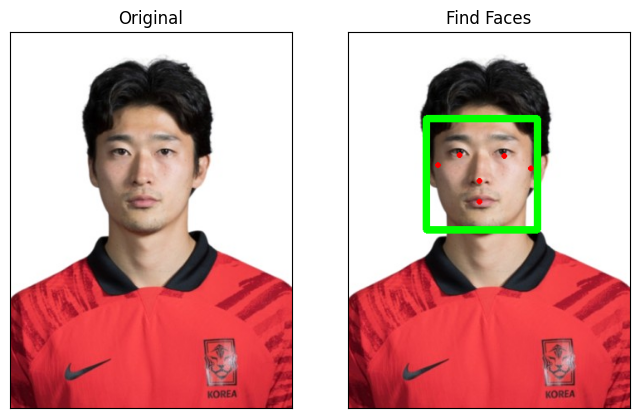

In [24]:
#detection face

mp_drawing = mp.solutions.drawing_utils
mp_face_mesh = mp.solutions.face_mesh

mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils 

draw_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
img1 = cv2.imread('/content/img1.jpg')

with mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5) as face_detection:
    results = face_detection.process(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    
    # Draw face detections of each face.
    if not results.detections:
        print("Face not found in image")
    else:
        print('Found {} faces.'.format(len(results.detections)))
        
        annotated_image = img1.copy()
        
        for detection in results.detections:
            # print(mp_face_detection.get_key_point(detection, mp_face_detection.FaceKeyPoint.NOSE_TIP))
            mp_drawing.draw_detection(annotated_image, detection, bbox_drawing_spec=mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=7))
            
        plt_imshow(["Original", "Find Faces"], [img1, annotated_image], figsize=(8,5))

Found 1 faces.


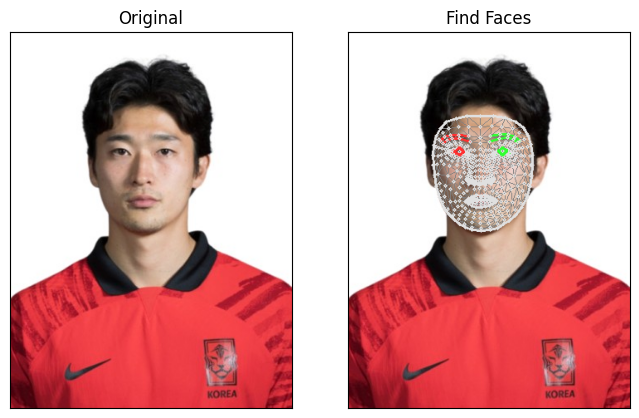

In [34]:
# face mesh

static_image_mode = True
max_num_faces = 10
refine_landmarks = True
min_detection_confidence = 0.5
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

img1 = cv2.imread('/content/img1.jpg')

with mp_face_mesh.FaceMesh(static_image_mode=static_image_mode, 
                           max_num_faces=max_num_faces, 
                           refine_landmarks=refine_landmarks, 
                           min_detection_confidence=min_detection_confidence) as face_mesh:
    results = face_mesh.process(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    
    if not results.multi_face_landmarks:
        print("Face not found in image")
    else:
        print('Found {} faces.'.format(len(results.multi_face_landmarks)))
        
        annotated_image = img1.copy()
        for face_landmarks in results.multi_face_landmarks:
            # print('face_landmarks:', face_landmarks)
            mp_drawing.draw_landmarks(image=annotated_image, 
                                      landmark_list=face_landmarks, 
                                      connections=mp_face_mesh.FACEMESH_TESSELATION,
                                      landmark_drawing_spec=drawing_spec, 
                                      connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style())
            mp_drawing.draw_landmarks(image=annotated_image,
                                      landmark_list=face_landmarks,
                                      connections=mp_face_mesh.FACEMESH_CONTOURS,
                                      landmark_drawing_spec=drawing_spec,
                                      connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_contours_style())
            mp_drawing.draw_landmarks(image=annotated_image,
                                      landmark_list=face_landmarks,
                                      connections=mp_face_mesh.FACEMESH_IRISES,
                                      landmark_drawing_spec=None,
                                      connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_iris_connections_style())
            
        plt_imshow(["Original", "Find Faces"], [img1, annotated_image], figsize=(8,5))


In [35]:
with mp_face_mesh.FaceMesh(min_detection_confidence=0.5, 
                           min_tracking_confidence=0.5) as face_mesh:
    image_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    results = face_mesh.process(image_rgb)
    if results.multi_face_landmarks:
      for face_landmark in results.multi_face_landmarks:
        mp_drawing.draw_landmarks(
            image=img1,
            landmark_list = face_landmark,
            connections=mp_face_mesh.FACEMESH_TESSELATION,
            landmark_drawing_spec  =draw_spec,
            connection_drawing_spec=draw_spec
        )

In [39]:
mp_drawing = mp.solutions.drawing_utils
mp_face_mesh = mp.solutions.face_mesh
from matplotlib import pyplot as plt

#face mesh 모델 초기화
with mp_face_mesh.FaceMesh(
    min_detection_confidence=0.5) as face_mesh:
  #로드
  image = cv2.imread('/content/img1.jpg')
  #rgb 공간으로 변환
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  #face mesh
  results = face_mesh.process(image_rgb)
  #결과출력
  if results.multi_face_landmarks:
    #얼굴특징점추출
    for face_landmarks in results.multi_face_landmarks:
      #특징점 저장할 딕셔너리 생성
      landmarks_dict = {}
      for id, landmark in enumerate(face_landmarks.landmark):
        #특징점 id랑 좌표 딕셔너리에 저장
        landmarks_dict[id] = (landmark.x, landmark.y, landmark.z)
        
      #그거 파일에 저장
      with open('img1.txt', 'w') as f:
        for id, landmark in landmarks_dict.items():
          f.write(f'{id}: {landmark}\n')
      

Image 2부터 (영상에서 캡쳐한다면 그 이미지들)

Found 1 faces.


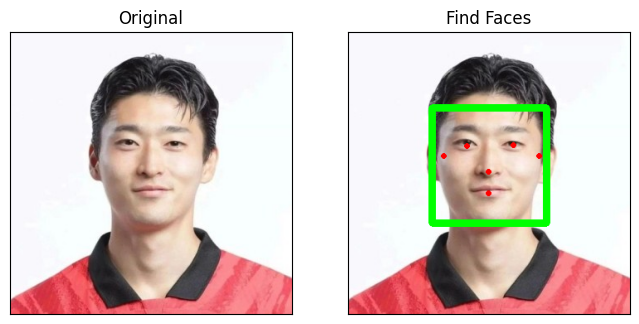

In [40]:
#detection face2

mp_drawing = mp.solutions.drawing_utils
mp_face_mesh = mp.solutions.face_mesh

mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils 

draw_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
img1 = cv2.imread('/content/img1_1.jpg')

with mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5) as face_detection:
    results = face_detection.process(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    
    # Draw face detections of each face.
    if not results.detections:
        print("Face not found in image")
    else:
        print('Found {} faces.'.format(len(results.detections)))
        
        annotated_image = img1.copy()
        
        for detection in results.detections:
            # print(mp_face_detection.get_key_point(detection, mp_face_detection.FaceKeyPoint.NOSE_TIP))
            mp_drawing.draw_detection(annotated_image, detection, bbox_drawing_spec=mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=7))
            
        plt_imshow(["Original", "Find Faces"], [img1, annotated_image], figsize=(8,5))

Found 1 faces.


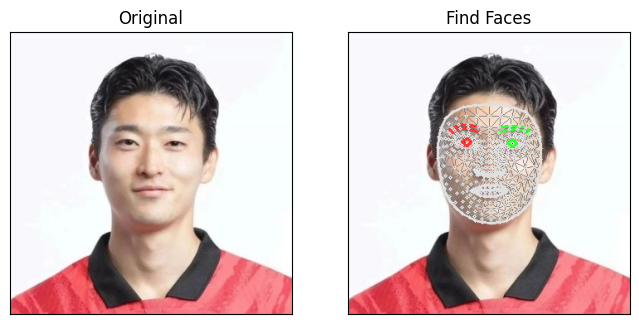

In [41]:
# face mesh2

static_image_mode = True
max_num_faces = 10
refine_landmarks = True
min_detection_confidence = 0.5
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

img1 = cv2.imread('/content/img1_1.jpg')

with mp_face_mesh.FaceMesh(static_image_mode=static_image_mode, 
                           max_num_faces=max_num_faces, 
                           refine_landmarks=refine_landmarks, 
                           min_detection_confidence=min_detection_confidence) as face_mesh:
    results = face_mesh.process(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    
    if not results.multi_face_landmarks:
        print("Face not found in image")
    else:
        print('Found {} faces.'.format(len(results.multi_face_landmarks)))
        
        annotated_image = img1.copy()
        for face_landmarks in results.multi_face_landmarks:
            # print('face_landmarks:', face_landmarks)
            mp_drawing.draw_landmarks(image=annotated_image, 
                                      landmark_list=face_landmarks, 
                                      connections=mp_face_mesh.FACEMESH_TESSELATION,
                                      landmark_drawing_spec=drawing_spec, 
                                      connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style())
            mp_drawing.draw_landmarks(image=annotated_image,
                                      landmark_list=face_landmarks,
                                      connections=mp_face_mesh.FACEMESH_CONTOURS,
                                      landmark_drawing_spec=drawing_spec,
                                      connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_contours_style())
            mp_drawing.draw_landmarks(image=annotated_image,
                                      landmark_list=face_landmarks,
                                      connections=mp_face_mesh.FACEMESH_IRISES,
                                      landmark_drawing_spec=None,
                                      connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_iris_connections_style())
            
        plt_imshow(["Original", "Find Faces"], [img1, annotated_image], figsize=(8,5))


In [42]:
mp_drawing = mp.solutions.drawing_utils
mp_face_mesh = mp.solutions.face_mesh
from matplotlib import pyplot as plt

#face mesh 모델 초기화
with mp_face_mesh.FaceMesh(
    min_detection_confidence=0.5) as face_mesh:
  #로드
  image = cv2.imread('/content/img1_1.jpg')
  #rgb 공간으로 변환
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  #face mesh
  results = face_mesh.process(image_rgb)
  #결과출력
  if results.multi_face_landmarks:
    #얼굴특징점추출
    for face_landmarks in results.multi_face_landmarks:
      #특징점 저장할 딕셔너리 생성
      landmarks_dict = {}
      for id, landmark in enumerate(face_landmarks.landmark):
        #특징점 id랑 좌표 딕셔너리에 저장
        landmarks_dict[id] = (landmark.x, landmark.y, landmark.z)
        
      #그거 파일에 저장
      with open('img1_1.txt', 'w') as f:
        for id, landmark in landmarks_dict.items():
          f.write(f'{id}: {landmark}\n')

라벨링 결과 비교


In [43]:
# 두 이미지 라벨링 결과 비교 ( 정보 읽어오는 함수)

def read_landmarks_from_file(file_path):

  with open(file_path, 'r') as f:
    lines = f.readlines()
    landmarks_dict = {}
    for line in lines:
      id, landmark = line.strip().split(': ')
      landmark = tuple(map(float, landmark.strip('()').split(', ')))
      landmarks_dict[int(id)] = landmark
    return landmarks_dict
# 두개 읽어와서 딕셔너리 형태로 반환

In [44]:
#두 라벨링 결과 비교 ( 특징점 비율 계산(일치하는지))

def compare_landmarks(landmarks1, landmarks1_1, threshold=0.15):
  count = 0
  for id, landmark1 in landmarks1.items():
    landmark1_1 = landmarks1_1.get(id)
    if landmark1_1 is not None:
      distance = ((landmark1[0] - landmark1_1[0]) **2 
                  + (landmark1[1] - landmark1_1[1])**2
                  +(landmark1[2] - landmark1_1[2])**2)**0.5
      if distance < threshold:
        count += 1
  
  return count / len(landmarks1)
  

In [45]:
file_path1 = '/content/img1.txt'
file_path1_1 = '/content/img1_1.txt'

#file_path1_2 = '/content/han_2.txt'
#file_path1_3 = '/content/landmarks1-3.txt'
#file_path1_4 = '/content/landmarks1-4.txt'
#file_path1_5 = '/content/landmarks1-5.txt'

landmark1 = read_landmarks_from_file(file_path1)
landmark1_1 = read_landmarks_from_file(file_path1_1)

#landmark1_2 = read_landmarks_from_file(file_path1_2)
#landmark1_3 = read_landmarks_from_file(file_path1_3)
#landmark1_4 = read_landmarks_from_file(file_path1_4)
#landmark1_5 = read_landmarks_from_file(file_path1_5)

similarity = compare_landmarks(landmark1, landmark1_1)

print(f'similarity: {similarity:2f}')

if similarity < 0.9:
  print("Diffrent person.")
else:
  print("Same person")


similarity: 0.993590
Same person


====================================
=====================================



In [ ]:
mp_drawing = mp.solutions.drawing_utils
mp_face_mesh = mp.solutions.face_mesh
from matplotlib import pyplot as plt

#face mesh 모델 초기화
with mp_face_mesh.FaceMesh(
    min_detection_confidence=0.5) as face_mesh:
  #로드
  image = cv2.imread('/content/image1-2.jpg')
  #rgb 공간으로 변환
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  #face mesh
  results = face_mesh.process(image_rgb)
  #결과출력
  if results.multi_face_landmarks:
    #얼굴특징점추출
    for face_landmarks in results.multi_face_landmarks:
      #특징점 저장할 딕셔너리 생성
      landmarks_dict = {}
      for id, landmark in enumerate(face_landmarks.landmark):
        #특징점 id랑 좌표 딕셔너리에 저장
        landmarks_dict[id] = (landmark.x, landmark.y, landmark.z)
        
      #그거 파일에 저장
      with open('landmarks1-2.txt', 'w') as f:
        for id, landmark in landmarks_dict.items():
          f.write(f'{id}: {landmark}\n')

In [ ]:
mp_drawing = mp.solutions.drawing_utils
mp_face_mesh = mp.solutions.face_mesh
from matplotlib import pyplot as plt

#face mesh 모델 초기화
with mp_face_mesh.FaceMesh(
    min_detection_confidence=0.5) as face_mesh:
  #로드
  image = cv2.imread('/content/image1-3.jpg')
  #rgb 공간으로 변환
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  #face mesh
  results = face_mesh.process(image_rgb)
  #결과출력
  if results.multi_face_landmarks:
    #얼굴특징점추출
    for face_landmarks in results.multi_face_landmarks:
      #특징점 저장할 딕셔너리 생성
      landmarks_dict = {}
      for id, landmark in enumerate(face_landmarks.landmark):
        #특징점 id랑 좌표 딕셔너리에 저장
        landmarks_dict[id] = (landmark.x, landmark.y, landmark.z)
        
      #그거 파일에 저장
      with open('landmarks1-3.txt', 'w') as f:
        for id, landmark in landmarks_dict.items():
          f.write(f'{id}: {landmark}\n')

In [ ]:
mp_drawing = mp.solutions.drawing_utils
mp_face_mesh = mp.solutions.face_mesh
from matplotlib import pyplot as plt

#face mesh 모델 초기화
with mp_face_mesh.FaceMesh(
    min_detection_confidence=0.5) as face_mesh:
  #로드
  image = cv2.imread('/content/image1-4.jpg')
  #rgb 공간으로 변환
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  #face mesh
  results = face_mesh.process(image_rgb)
  #결과출력
  if results.multi_face_landmarks:
    #얼굴특징점추출
    for face_landmarks in results.multi_face_landmarks:
      #특징점 저장할 딕셔너리 생성
      landmarks_dict = {}
      for id, landmark in enumerate(face_landmarks.landmark):
        #특징점 id랑 좌표 딕셔너리에 저장
        landmarks_dict[id] = (landmark.x, landmark.y, landmark.z)
        
      #그거 파일에 저장
      with open('landmarks1-4.txt', 'w') as f:
        for id, landmark in landmarks_dict.items():
          f.write(f'{id}: {landmark}\n')

In [ ]:
mp_drawing = mp.solutions.drawing_utils
mp_face_mesh = mp.solutions.face_mesh
from matplotlib import pyplot as plt

#face mesh 모델 초기화
with mp_face_mesh.FaceMesh(
    min_detection_confidence=0.5) as face_mesh:
  #로드
  image = cv2.imread('/content/image1-5.jpg')
  #rgb 공간으로 변환
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  #face mesh
  results = face_mesh.process(image_rgb)
  #결과출력
  if results.multi_face_landmarks:
    #얼굴특징점추출
    for face_landmarks in results.multi_face_landmarks:
      #특징점 저장할 딕셔너리 생성
      landmarks_dict = {}
      for id, landmark in enumerate(face_landmarks.landmark):
        #특징점 id랑 좌표 딕셔너리에 저장
        landmarks_dict[id] = (landmark.x, landmark.y, landmark.z)
        
      #그거 파일에 저장
      with open('landmarks1-5.txt', 'w') as f:
        for id, landmark in landmarks_dict.items():
          f.write(f'{id}: {landmark}\n')

=================================================


In [ ]:
def normalize_landmarks(landmarks1, landmarks2):
    """
    두 이미지에서 추출한 랜드마크를 정규화하여 크기와 위치를 일치시킵니다.
    """
    # 랜드마크 중심점 계산
    center1 = np.mean(landmarks1, axis=0)
    center2 = np.mean(landmarks2, axis=0)

    # 랜드마크 크기 계산
    size1 = np.max(landmarks1, axis=0) - np.min(landmarks1, axis=0)
    size2 = np.max(landmarks2, axis=0) - np.min(landmarks2, axis=0)

    # 중심점 이동 및 크기 조절을 위한 변환 행렬 계산
    M = cv2.estimateAffinePartial2D(landmarks1, landmarks2)[0]

    # 랜드마크 정규화
    landmarks1_norm = cv2.transform(landmarks1.reshape(-1, 1, 2), M).reshape(-1, 2)
    landmarks2_norm = landmarks2

    return landmarks1_norm, landmarks2_norm